In [1]:
import pandas as pd
from divergent_files import scan_for_divergence, exec_metadata_path
from json import loads
from copy import deepcopy

In [2]:
def to_pd_frame():
    files = scan_for_divergence()['subset']
    res = []
    threshold = 0.05
    for f in files:
        print(f)
        fullpath = exec_metadata_path + f
        local =  [0, 0]
        content = loads(open(fullpath).read())
        subset_metadata = content['subset_metadata']
        for key, val in subset_metadata.items():
            if val['divergence_from_qiskit']['p-value'] < threshold:
                local[0] += 1
            else:
                local[1] += 1
        res.append(local)
    return res

data = to_pd_frame()
data

ac576f9b983141608ad047b2bb4beb42.json
f54bc440c98d436f91b5acbce1caeac2.json
eacae1596b3842a5b8e1ca446b410faf.json
d85a5ac8d6d44bdea20935e7a1f5a1e9.json
c7147382202e4578a4103cc2b0621b8b.json
cedb2231a10f430e9753dc74d9f2ace5.json
8e4333edbbc64709aa7aa7b183f5a28b.json
dc33ba65e8964c45b72bf2a78e36915a.json
45bdd037b81249809d4cd736fcafda85.json
b6932e6714b04e0885181987bbca7f6d.json


[[7, 248],
 [36, 219],
 [48, 207],
 [43, 212],
 [14, 241],
 [0, 255],
 [1, 254],
 [10, 245],
 [7, 248],
 [22, 233]]

<AxesSubplot: >

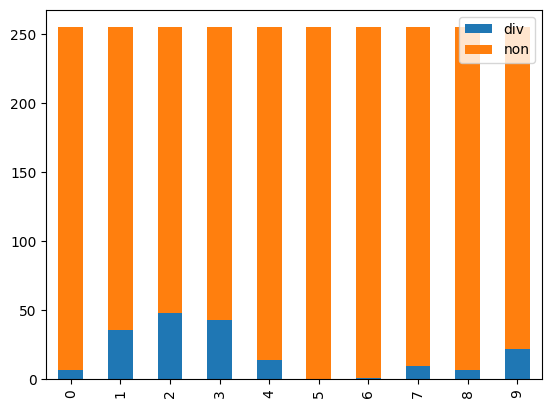

In [4]:
df = pd.DataFrame(data, columns=['div', 'non'])
df.plot.bar(stacked=True)